### Dataset Collab Upload

In [ ]:
# from google.colab import files
# uploaded = files.upload()

#### Import required libraries.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import csv
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dropout
import nltk
nltk.download('stopwords')  
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
import io

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Identifing the dataset encoding

In [ ]:
import chardet
with open("spam.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

#### Importing the dataset

In [ ]:
#dataset = pd.read_csv(io.BytesIO(uploaded['spam.csv']), encoding = "Windows-1252")

In [ ]:
dataset = pd.read_csv("spam.csv", encoding = "Windows-1252")
type(dataset)

pandas.core.frame.DataFrame

In [ ]:
dataset

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


## Dataset Description

In [ ]:
dataset.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


### Model Parameters

In [ ]:
vocab_size = 5000
embedding_dim = 64
max_length = 200
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

### Removing the stop words
###### text as it doesn't helps in model building.

In [ ]:
articles = []
labels = []

with open("spam.csv", 'r', encoding="Windows-1252") as dataset:
    reader = csv.reader(dataset, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        article = row[1]
        for word in STOPWORDS:
            token = ' ' + word + ' '
            article = article.replace(token, ' ')
            article = article.replace(' ', ' ')
        articles.append(article)
print("NO OF LABELS ",len(labels))
print("NO OF ARTICLES ",len(articles))

NO OF LABELS  5572
NO OF ARTICLES  5572


#### SPLITTING THE DATASET INTO TRAINING AND VALIDATION
##### TRAINING - 80%


In [ ]:
train_size = int(len(articles) * training_portion)

train_articles = articles[0: train_size]
train_labels = labels[0: train_size]

validation_articles = articles[train_size:]
validation_labels = labels[train_size:]

print("NO OF TRAINING DS ",train_size)
print("NO OF TRAINING ARTICLES ",len(train_articles))
print("NO OF TRAINING LABELS ",len(train_labels))
print("NO OF VALIDATION ARTICLES ",len(validation_articles))
print("NO OF VALIDATION LABELS ",len(validation_labels))

NO OF TRAINING DS  4457
NO OF TRAINING ARTICLES  4457
NO OF TRAINING LABELS  4457
NO OF VALIDATION ARTICLES  1115
NO OF VALIDATION LABELS  1115


#### SPLITTING THE SENTENCES (TOKENISATION)

In [ ]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
word_index = tokenizer.word_index
dict(list(word_index.items())[0:10])

{'<OOV>': 1,
 'i': 2,
 'u': 3,
 'call': 4,
 'you': 5,
 '2': 6,
 'get': 7,
 "i'm": 8,
 'ur': 9,
 'now': 10}

#### Training data to Sequences.

In [ ]:
train_sequences = tokenizer.texts_to_sequences(train_articles)
print(train_sequences[10])

[8, 190, 37, 201, 30, 260, 293, 991, 222, 53, 153, 3815, 423, 46]


### Adding padding
To ensure every list contians same number of elemens to train.

IN TRAINING

In [ ]:
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print("NO OF TRAIN SEQUENCE AT POSITION 0 ",len(train_sequences[0]))
print("NO OF TRAIN PADDED AT POSITION 0 ",len(train_padded[0]))

print("NO OF TRAIN SEQUENCE AT POSITION 1 ",len(train_sequences[1]))
print("NO OF TRAIN PADDED AT POSITION 1 ",len(train_padded[1]))

print("NO OF TRAIN SEQUENCE AT POSITION 10 ",len(train_sequences[10]))
print("NO OF TRAIN PADDED AT POSITION 10 ",len(train_padded[10]))

NO OF TRAIN SEQUENCE AT POSITION 0  16
NO OF TRAIN PADDED AT POSITION 0  200
NO OF TRAIN SEQUENCE AT POSITION 1  6
NO OF TRAIN PADDED AT POSITION 1  200
NO OF TRAIN SEQUENCE AT POSITION 10  14
NO OF TRAIN PADDED AT POSITION 10  200


In [ ]:
print(train_padded[10])

[   8  190   37  201   30  260  293  991  222   53  153 3815  423   46
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

IN VALIDATION

In [ ]:
validation_sequences = tokenizer.texts_to_sequences(validation_articles)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(validation_sequences))
print(validation_padded.shape)

1115
(1115, 200)


In [ ]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[1]
[1]
[2]
(4457, 1)
[1]
[2]
[1]
(1115, 1)


In [ ]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_article(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])
print(decode_article(train_padded[10]))
print('---')
print(train_articles[10])

i'm gonna home soon want talk stuff anymore tonight k i've cried enough today ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
---
I'm gonna home soon want talk stuff anymore tonight, k? I've cried enough today.


### Implementing LSTM. [LONG TERM SHORT TERM]
##### LSTM IS USED TO TRAIN THE MODELS WITH PRESERVING, ##### LONGER SEQUENCES, IN SHORT 1ST WORD WILL AFFECT THE Nth WORD

In [ ]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 5000, 
    # and output embedding dimension of size 64 we set at the top
    tf.keras.layers.Embedding(vocab_size, embedding_dim),

    # Using Bi Directional LSTM which trains on both side for better prediction.
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),

    # Using Sigmoid Activation Function
    tf.keras.layers.Dense(embedding_dim, activation='sigmoid'),

    tf.keras.layers.Dense(64, activation='sigmoid'),
    tf.keras.layers.Dense(32, activation='sigmoid'),
    
    Dropout(0.3),
    # Add a op layer with 6 units and softmax activation.
    tf.keras.layers.Dense(6, activation='softmax')
    # In output layer, softmax convert outputs layers into a probability distribution.
])
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_19 (Embedding)    (None, None, 64)          320000    
                                                                 
 bidirectional_27 (Bidirecti  (None, 128)              66048     
 onal)                                                           
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 64)                4160      
                                                                 
 dense_47 (Dense)            (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                     

In [ ]:
print(set(labels))

{'spam', 'ham'}


ham -> Not Spam
Spam -> Spam

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
140/140 - 37s - loss: 0.7656 - accuracy: 0.7723 - val_loss: 0.4255 - val_accuracy: 0.8700 - 37s/epoch - 262ms/step
Epoch 2/10
140/140 - 29s - loss: 0.4617 - accuracy: 0.8625 - val_loss: 0.4014 - val_accuracy: 0.8700 - 29s/epoch - 208ms/step
Epoch 3/10
140/140 - 29s - loss: 0.4398 - accuracy: 0.8647 - val_loss: 0.3954 - val_accuracy: 0.8700 - 29s/epoch - 207ms/step
Epoch 4/10
140/140 - 29s - loss: 0.4228 - accuracy: 0.8645 - val_loss: 0.3935 - val_accuracy: 0.8700 - 29s/epoch - 208ms/step
Epoch 5/10
140/140 - 29s - loss: 0.4131 - accuracy: 0.8649 - val_loss: 0.3907 - val_accuracy: 0.8700 - 29s/epoch - 207ms/step
Epoch 6/10
140/140 - 29s - loss: 0.4157 - accuracy: 0.8649 - val_loss: 0.3903 - val_accuracy: 0.8700 - 29s/epoch - 208ms/step
Epoch 7/10
140/140 - 30s - loss: 0.4138 - accuracy: 0.8649 - val_loss: 0.3897 - val_accuracy: 0.8700 - 30s/epoch - 216ms/step
Epoch 8/10
140/140 - 29s - loss: 0.4070 - accuracy: 0.8649 - val_loss: 0.3885 - val_accuracy: 0.8700 - 29s/epoch - 207

### Accuracy at every EPOCH

In [ ]:
history.history['accuracy']

[0.7722683548927307,
 0.8624635338783264,
 0.8647072315216064,
 0.8644828200340271,
 0.864931583404541,
 0.864931583404541,
 0.864931583404541,
 0.864931583404541,
 0.864931583404541,
 0.864931583404541]

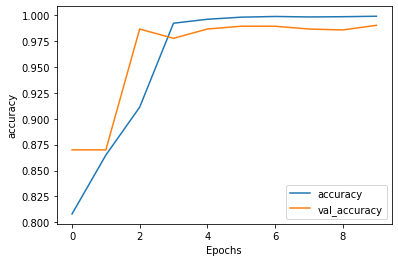

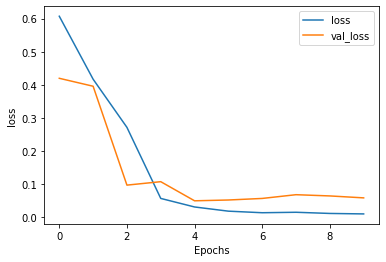

In [ ]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")